## ~~년도가 업데이트되면 그 전 데이터는 받을 수 없음~~
## ~~분기와 년도로 분리~~

In [23]:
from fnguide import Data
import pandas as pd
import numpy as np
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
import os
import pandas as pd
from pykrx import stock
import pyautogui
import time
import numpy as np
from tqdm import tqdm
import pymysql
from selenium import webdriver
import shutil
import FinanceDataReader as fdr

import matplotlib.pyplot as plt
import math
warnings.filterwarnings(action='ignore')

In [25]:
compute_type = 'value'

In [26]:
fnguide = Data()
fnguide.setMaria()
if compute_type == 'value':
    an_wish_list = ['jabongeum', 'jabonchonggye', 'jasanchonggye', 'buchaechonggye', 'muhyeongjasan',
                    'yudongjasan', 'yudongbuchae',
                    'hyeongeumseongjasan', 'maechulaeg', 'yeongeobiig', 'janggichaibgeum', 'dangichaibgeum',
                    'danggisuniig',
                    'jibaejujujibun', 'botongju', 'useonju', 'jibaejujusuniig', 'iyeonbeobinsejasan',
                    'iyeonbeobinsebuchae', 'baedanggeum']
    qt_wish_list = ['danggisuniig', 'jibaejujusuniig', 'jibaejujujibun']

periods = ['2021_03']
buy_days = ['20210506']

In [27]:
years = [p.split('_')[0] for p in periods]
qts = [p.split('_')[1] for p in periods]

In [29]:
i = 0
if qts[i] != '12':
    df_qt = fnguide.mergeAll(wish_list=qt_wish_list, year=int(years[i]), qt=qts[i])
    df = fnguide.mergeAll(wish_list=an_wish_list, year=int(years[i]) - 1, qt='12')
    df = pd.merge(df_qt, df, on=['code', 'name']).reset_index(drop=True)
    df = fnguide.calValueDanggisuniig(df)
    if compute_type == 'dcf':
        df = fnguide.mergeDcfData(df=df, year=int(years[i])-1)
else:
    df = fnguide.mergeAll(wish_list=an_wish_list, year=int(years[i]), qt='12')
    if compute_type == 'dcf':
        df = fnguide.mergeDcfData(df=df, year=int(years[i]))

mergeAll(2021, 03)==============================================================================================
['danggisuniig', 'jibaejujusuniig', 'jibaejujujibun'] 데이터를 모두 병합합니다.
(1146, "Table 'fnguide.dataq_danggisuniig' doesn't exist")


AttributeError: 'NoneType' object has no attribute 'replace'

# Visualize

In [104]:
kospi = fdr.DataReader('KS11', buy_days[0], sell_day).reset_index(drop=False)
kosdaq = fdr.DataReader('KQ11', buy_days[0], sell_day).reset_index(drop=False)

In [88]:
budget = 1
kospi_bg = 1
kosdaq_bg = 1
budget_list = [budget]
kospi_list = [kospi_bg]
kodaq_list = [kosdaq_bg]
for i in range(len(periods)):
    budget = budget*(1 + samsung_rate[i])
    kospi_bg = kospi_bg * (1 + rates_df['kospi'].iloc[0]/100)
    kosdaq_bg = kosdaq_bg * (1 + rates_df['kosdaq'].iloc[0]/100)
    budget_list.append(budget)
    kospi_list.append(kospi_bg)
    kodaq_list.append(kosdaq_bg)

In [105]:
scaler = MinMaxScaler()
x_values = list(samsung['Date'])
y_values1 = pd.DataFrame(scaler.fit_transform((samsung[['Close']])))[0]
y_values2 = pd.DataFrame(scaler.fit_transform((kospi[['Close']])))[0]
y_values3 = pd.DataFrame(scaler.fit_transform((kosdaq[['Close']])))[0]
plt.figure(figsize=(15, 6))
plt.plot(x_values, y_values1, color='b')
plt.plot(x_values, y_values2, color='r')
plt.plot(x_values, y_values3, color='g')
plt.legend(['samsung', 'kospi', 'kosdaq'])
plt.show()

scaler = MinMaxScaler()
x_values = rates_df['periods']
y_values1 = budget_list[1:]
y_values2 = kospi_list[1:]
y_values3 = kodaq_list[1:]
plt.figure(figsize=(15, 6))
plt.plot(x_values, y_values1, color='b')
plt.plot(x_values, y_values2, color='r')
plt.plot(x_values, y_values3, color='g')
plt.legend(['samsung', 'kospi', 'kosdaq'])
plt.show()

[0.20823798627002288,
 -0.1005586592178771,
 0.003134796238244514,
 0.22675026123301986,
 0.0896551724137931,
 0.2368024132730015]

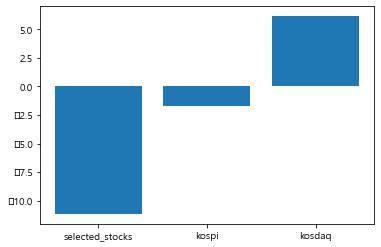

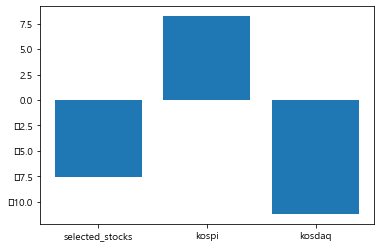

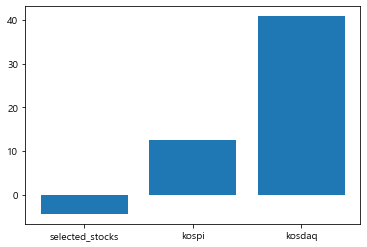

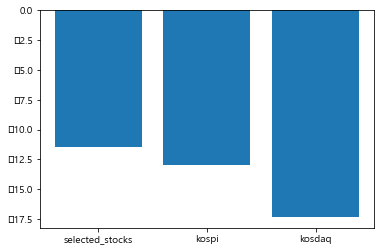

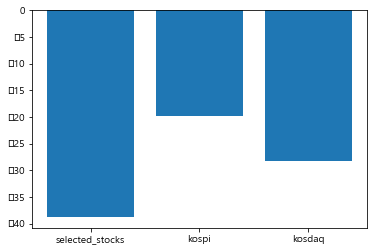

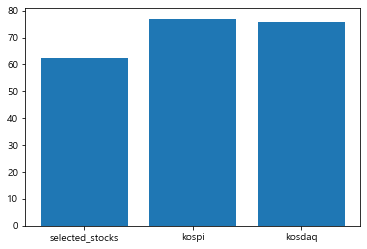

In [31]:
for i in range(rates_df.shape[0]):
    main.showPlot(pd.DataFrame(rates_df.iloc[i][list(rates_df.columns[1:])]).transpose())

# Collect

In [347]:
pyautogui.position()

Point(x=1246, y=244)

In [22]:
main.setMaria()
orgin_df = main.mariaShowData('data_maechulaeg')

#code_list = list(orgin_df[orgin_df['2020_12'] == -123456]['code'])

# for i in tqdm(range(len(code_list))):
#     pyautogui.moveTo(1241, 244, np.random.randint(2)+1)
#     pyautogui.click()
#     time.sleep(0.5)
#     pyautogui.moveTo(1194, 244, 0.5)
#     pyautogui.click()
#     time.sleep(0.2)
#     pyautogui.typewrite(code_list[i])
#     time.sleep(0.2)
#     pyautogui.press('enter')
#     time.sleep(1)
#     pyautogui.moveTo(1852, 404, 1)
#     pyautogui.click()
#     time.sleep(3)

In [21]:
pd.read_csv('notyet.csv', encoding='utf-8')

,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,60,메리츠화재,-123456.0,2.440540e+12,2.283200e+12,1.779250e+12,1.638550e+12,1.481130e+12,1.402170e+12,1.042840e+12,1.089530e+12,9.007460e+11,6.855420e+11
1,300,대유플러스,-123456.0,1.731570e+11,1.406090e+11,1.202000e+11,1.198850e+11,1.065930e+11,1.069490e+11,1.078000e+11,1.011990e+11,9.078330e+10,7.271770e+10
2,400,롯데손해보험,-123456.0,9.658500e+11,5.633370e+11,5.472540e+11,5.013890e+11,4.430120e+11,3.044710e+11,2.647780e+11,2.953980e+11,2.119850e+11,2.016840e+11
3,540,흥국화재,-123456.0,7.119610e+11,6.820340e+11,6.293360e+11,5.522580e+11,4.420220e+11,4.015830e+11,2.907510e+11,3.696850e+11,2.103360e+11,8.909500e+10
4,1200,유진투자증권,-123456.0,7.895680e+11,7.516990e+11,7.079880e+11,6.643840e+11,6.135170e+11,5.698250e+11,4.848570e+11,4.951030e+11,5.437580e+11,6.399340e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,900340,윙입푸드,-123456.0,1.001480e+11,8.399380e+10,4.494620e+10,2.997760e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
559,950160,코오롱티슈진,-123456.0,9.356150e+10,1.372880e+11,1.601070e+11,8.778420e+09,1.788510e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
560,950200,소마젠(Reg.S),-123456.0,-1.889360e+10,-3.438130e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
561,950210,프레스티지바이오파마,-123456.0,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


In [26]:
orgin_df[orgin_df['2020_12'] == -123456].reset_index(drop=True).to_csv('notyet2.csv', index=False, encoding='utf-8')

In [354]:
pd.DataFrame().to_csv('C:/Users/choi97201/Downloads/포괄손익계산서.csv')
# 보고서 선택
pyautogui.moveTo(1621, 296, 1)
time.sleep(0.2)
pyautogui.click()
# 포괄손익보고서 선택
pyautogui.moveTo(1631, 331, 1)
time.sleep(0.2)
pyautogui.click()
time.sleep(0.2)
# 조회
pyautogui.moveTo(1869, 348, 1)
pyautogui.click()
time.sleep(1)

In [7]:
#main.setFnCsvPath('C:/Users/choi97201/Downloads/pogwalsoniggyesanseo')
stock_name_df = main.getStockNameCodeDf()
main.setFnCsvPath('C:/Users/choi97201/Downloads/quarter/jaemusangtaepyo')

file_list = main.getFnCsvFileList()

for i in tqdm(range(len(code_list))):
    if stock_name_df['회사명'].iloc[i] + '.csv' in file_list:
        continue
    pyautogui.moveTo(1241, 249, np.random.randint(2)+1)
    pyautogui.click()
    time.sleep(0.5)
    pyautogui.moveTo(1194, 249, 0.5)
    pyautogui.click()
    time.sleep(0.2)
    pyautogui.typewrite(code_list[i])
    time.sleep(0.2)
    pyautogui.press('enter')
    time.sleep(1)
    pyautogui.moveTo(1852, 404, 1)
    pyautogui.click()
    time.sleep(3)
    

  5%|███▉                                                                         | 110/2136 [18:07<5:33:58,  9.89s/it]


KeyboardInterrupt: 

In [156]:
pd.DataFrame().to_csv('C:/Users/choi97201/Downloads/재무비율.csv')
# 보고서 선택
pyautogui.moveTo(1621, 336, 1)
time.sleep(0.2)
pyautogui.click()
# 재무비율 선택
pyautogui.moveTo(1624, 426, 1)
time.sleep(0.2)
pyautogui.click()
time.sleep(0.2)
# 조회
pyautogui.moveTo(1869, 388, 1)
pyautogui.click()
time.sleep(1)

In [157]:
main.setFnCsvPath('C:/Users/choi97201/Downloads/quarter/jaemubiyul')
file_list = main.getFnCsvFileList()
stock_name_df.shape[0]
for i in tqdm(range(10)):
    if stock_name_df['회사명'].iloc[i] + '.csv' in file_list:
        continue
    pyautogui.moveTo(1241, 289, np.random.randint(2)+1)
    pyautogui.click()
    time.sleep(0.5)
    pyautogui.moveTo(1194, 289, 0.5)
    pyautogui.click()
    time.sleep(0.2)
    pyautogui.typewrite(str(stock_name_df.iloc[i]['종목코드']))
    time.sleep(0.2)
    pyautogui.press('enter')
    time.sleep(1)
    pyautogui.moveTo(1852, 444, 1)
    pyautogui.click()
    time.sleep(3)
    

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [01:36<00:00,  9.65s/it]


# Insert Fn Data

In [96]:
main = Data()
main.setMaria()
#main.insertFnData(gb='jaemusangtaepyo', is_quarter=True)
main.insertFnData(gb='hyeongeumheuleumpyo', is_quarter=False)

  1%|▊                                                                               | 20/1921 [00:02<04:03,  7.82it/s]


KeyboardInterrupt: 

# 기간 다른 테이블 합치기

In [30]:
df = fnguide.mariaShowTables("show tables like 'fnguide%'")

In [68]:

is_quarter = True

In [70]:
an_table

['beobinsebiyong',
 'biyudongjasan',
 'botongju',
 'buchaechonggye',
 'danggisuniig',
 'dangichaibgeum',
 'gamgasanggagbi',
 'hyeongeumseongjasan',
 'ijabiyong',
 'iyeonbeobinsebuchae',
 'iyeonbeobinsejasan',
 'jabonchonggye',
 'jabongeum',
 'janggichaibgeum',
 'jasanchonggye',
 'jibaejujujibun',
 'jibaejujusuniig',
 'maechulaeg',
 'maechulchongiig',
 'muhyeongjasan',
 'useonju',
 'yeongeobiig',
 'yudongbuchae',
 'yudongjasan']

In [63]:
# # 분기

# 사업
for an in an_table:
    # subject의 19년도 데이터
    tablename = 'fnguide_{}_2019_12'.format(an)
    tmp1 = main.mariaShowData(tablename)
    # 20년도 열 생성
    cols = list(tmp1.columns)[2:]
    #tmp1['2020_12'] = [-123456]*tmp1.shape[0]
    #tmp1 = tmp1[['code', 'name', '2020_12'] + cols]

    # subject의 20년도 데이터
    tablename = 'fnguide_{}_2020_12'.format(an)
    tmp2 = main.mariaShowData(tablename)
    merged_table = pd.merge(tmp2, tmp1[['code', 'name', '2010_12']] , on=['code', 'name']).reset_index(drop=True)

    tmp2['2010_12'] = [-123456]*tmp2.shape[0]
    
    tmp1['2020_12'] = [-123456]*tmp1.shape[0]
    tmp1 = tmp1[['code', 'name', '2020_12'] + cols]
    
    df = pd.concat([merged_table, tmp2, tmp1]).drop_duplicates('code', keep='first').reset_index(drop=True)

    cols = list(df.columns)
    dtypes = ['VARCHAR(20)', 'VARCHAR(40)'] + ['FLOAT']*(len(cols)-2)

    tablename = 'data_{}'.format(an)
    main.mariaCreateTable(tablename=tablename, columns=cols, columns_type=dtypes)
    main.mariaSql('truncate ' + tablename)
    for i in range(df.shape[0]):
        main.mariaInsertData(tablename=tablename, data=tuple(df.iloc[i]))
    main.mariaCommitDB()

,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12


CREATE TABLE data_baedanggeum (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_baedanggeum' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,4.923180e+09,7.133270e+09,4.470950e+09,1.820970e+10,9.400760e+09,3.919710e+08,4.647370e+08,-1.219550e+08,7.118400e+09,1.353870e+09,2.132160e+09
1,000040,KR모터스,9.974500e+07,5.478790e+08,1.096400e+07,-7.186820e+09,1.360260e+08,-1.232870e+08,-2.970000e+06,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
2,000070,삼양홀딩스,2.741610e+10,1.897800e+10,2.679770e+10,2.217250e+10,3.754300e+10,2.688600e+10,2.534190e+10,1.611890e+10,1.950910e+10,-5.515460e+09,2.529910e+10
3,000080,하이트진로,3.697540e+10,4.284500e+10,1.972650e+10,2.695430e+10,2.273760e+10,2.644170e+10,1.665220e+10,7.551410e+10,3.345000e+10,4.065890e+10,6.887520e+10
4,000120,CJ대한통운,5.967510e+10,4.294370e+10,3.321890e+10,3.424840e+10,2.280930e+10,1.709640e+10,1.412560e+10,-3.039070e+10,3.303990e+10,3.447360e+10,4.252220e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1715,950140,잉글우드랩,1.719480e+09,3.372890e+09,1.080310e+09,-1.265640e+09,2.434950e+09,6.663980e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1716,950160,코오롱티슈진,1.236820e+08,5.176700e+07,3.244800e+07,3.751010e+09,-1.852150e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1717,950190,미투젠,8.481130e+09,7.819330e+09,5.711160e+09,2.455040e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1718,950200,소마젠(Reg.S),2.701000e+06,-2.758000e+06,1.575000e+06,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_beobinsebiyong (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_beobinsebiyong' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,2.110640e+11,1.409000e+11,1.427120e+11,1.327250e+11,1.731130e+11,1.821720e+11,1.925250e+11,1.994060e+11,2.030490e+11,2.071100e+11,1.769200e+11
1,000040,KR모터스,9.490290e+10,9.138210e+10,6.795130e+10,6.517560e+10,7.166940e+10,7.617770e+10,6.980810e+10,5.723390e+10,5.764270e+10,6.031560e+10,6.340790e+10
2,000070,삼양홀딩스,2.417650e+12,2.330040e+12,2.256560e+12,2.143840e+12,2.019790e+12,2.042570e+12,1.673790e+12,1.597440e+12,1.581740e+12,1.228770e+12,1.399410e+12
3,000080,하이트진로,2.398400e+12,2.488590e+12,2.363180e+12,2.396600e+12,2.443430e+12,2.608540e+12,2.689780e+12,2.755750e+12,2.706720e+12,2.542400e+12,1.009380e+12
4,000120,CJ대한통운,7.104950e+12,6.787820e+12,5.687720e+12,4.482460e+12,4.010060e+12,3.261190e+12,3.278350e+12,3.279040e+12,2.991850e+12,2.782700e+12,3.172090e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,950140,잉글우드랩,3.996080e+10,4.481790e+10,4.549720e+10,4.598270e+10,1.928800e+10,2.153970e+10,2.233080e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1869,950160,코오롱티슈진,9.808980e+09,1.292100e+10,8.083390e+09,3.175880e+09,5.239770e+09,3.749940e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1870,950190,미투젠,4.168500e+09,5.090960e+09,1.270010e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1871,950200,소마젠(Reg.S),1.644800e+10,1.728810e+10,9.330670e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_biyudongjasan (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_biyudongjasan' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,27931500.0,27931500.0,27931500.0,27931500.0,27931500.0,27931500.0,27931500.0,27931500.0,27931500.0,27931500.0,27931500.0
1,000040,KR모터스,91661000.0,189444000.0,189444000.0,119760000.0,176129000.0,175308000.0,119341000.0,119341000.0,119341000.0,119341000.0,119341000.0
2,000070,삼양홀딩스,8868330.0,8868330.0,8564270.0,8564270.0,8564270.0,8564270.0,8564270.0,8170460.0,7705000.0,5756190.0,10018100.0
3,000080,하이트진로,70133600.0,70133600.0,70133600.0,70133600.0,70133600.0,70133600.0,70133600.0,70133600.0,69477700.0,69477700.0,40495300.0
4,000120,CJ대한통운,22812300.0,22812300.0,22812300.0,22812300.0,22812300.0,22812300.0,22812300.0,22812300.0,22812300.0,22812300.0,22812300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,950140,잉글우드랩,19867900.0,19867900.0,19867900.0,19867900.0,19867900.0,12956200.0,9365620.0,-123456.0,-123456.0,-123456.0,-123456.0
1844,950160,코오롱티슈진,12223500.0,12223500.0,12203500.0,12089700.0,3463270.0,3463270.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0
1845,950190,미투젠,13452400.0,11133400.0,111334.0,111334.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0
1846,950200,소마젠(Reg.S),18926500.0,12451300.0,10386000.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0


CREATE TABLE data_botongju (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_botongju' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,9.112560e+10,7.664910e+10,7.319860e+10,7.028040e+10,7.167920e+10,8.706930e+10,8.334730e+10,8.893440e+10,9.729000e+10,1.098080e+11,1.161910e+11
1,000040,KR모터스,1.060280e+11,1.088710e+11,8.500650e+10,6.322160e+10,8.612990e+10,8.981350e+10,9.106780e+10,5.961700e+10,5.853010e+10,6.457310e+10,7.797410e+10
2,000060,메리츠화재,2.267620e+13,2.077510e+13,1.819560e+13,1.637320e+13,1.493510e+13,1.335130e+13,1.164520e+13,1.000980e+13,9.083240e+12,7.762880e+12,6.576770e+12
3,000070,삼양홀딩스,1.737780e+12,1.560010e+12,1.311860e+12,1.336170e+12,1.318810e+12,1.275060e+12,1.141550e+12,9.368580e+11,1.085440e+12,5.867910e+11,8.732030e+11
4,000080,하이트진로,2.223510e+12,2.237660e+12,2.265760e+12,2.290090e+12,2.109180e+12,2.135880e+12,2.094440e+12,2.170030e+12,2.109590e+12,2.150020e+12,8.077030e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,950140,잉글우드랩,4.805070e+10,5.421830e+10,4.806740e+10,3.211580e+10,9.650860e+09,1.962970e+10,1.011730e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1913,950160,코오롱티슈진,2.469170e+10,3.192900e+10,2.733300e+10,3.241890e+10,2.060580e+10,8.802930e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1914,950190,미투젠,1.466800e+10,2.250570e+10,9.978230e+09,8.352500e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1915,950200,소마젠(Reg.S),1.336270e+10,4.716790e+10,2.457420e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_buchaechonggye (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_buchaechonggye' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,2.871510e+10,9.107600e+09,1.006810e+10,4.700900e+10,2.625430e+10,5.608650e+09,4.937210e+09,1.011860e+09,1.311240e+09,1.767920e+10,1.100410e+10
1,000040,KR모터스,-1.148600e+10,-4.104170e+10,-2.444210e+10,-3.150130e+10,-9.978620e+09,-1.659640e+10,-1.272780e+10,-6.614450e+09,-8.232050e+09,1.904750e+09,-5.004780e+08
2,000070,삼양홀딩스,1.432650e+11,6.204390e+10,1.025120e+11,6.718640e+10,6.513770e+10,7.801620e+10,2.100360e+10,-2.620800e+10,1.297450e+11,1.680880e+11,1.430970e+11
3,000080,하이트진로,8.662850e+10,-4.239500e+10,2.227240e+10,1.273600e+10,3.844720e+10,5.336010e+10,2.125380e+10,7.910300e+10,1.035360e+11,7.024250e+10,4.762040e+10
4,000120,CJ대한통운,1.426230e+11,5.088990e+10,6.660010e+10,5.417860e+10,6.821010e+10,4.898400e+10,5.945170e+10,-6.006110e+10,6.957190e+10,8.099430e+10,9.880370e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,950140,잉글우드랩,3.081860e+09,2.268540e+09,-5.898840e+09,-1.387790e+10,-2.837290e+08,5.528760e+09,4.395080e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1706,950160,코오롱티슈진,-4.178840e+10,-4.998860e+10,-3.226540e+10,-4.543280e+10,-2.622470e+09,-6.251230e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1707,950190,미투젠,3.873340e+10,3.524470e+10,2.740480e+10,1.181170e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1708,950200,소마젠(Reg.S),-2.158530e+10,-2.306690e+10,-2.581040e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_danggisuniig (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_danggisuniig' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,9.800000e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,2.000000e+09,2.000000e+09,4.000000e+09,-1.234560e+05,-1.234560e+05,2.702900e+10
1,000040,KR모터스,4.008340e+09,5.281480e+10,1.587700e+09,1.705910e+10,2.310920e+10,1.773260e+10,1.803080e+10,1.060000e+10,1.040170e+10,1.030470e+10,1.500000e+10
2,000070,삼양홀딩스,7.076470e+10,1.210510e+11,1.011560e+11,1.454510e+11,2.568590e+11,2.435370e+11,3.296680e+11,2.951980e+11,4.268920e+11,1.901490e+11,3.375220e+11
3,000080,하이트진로,3.024610e+11,3.163350e+11,4.394770e+11,4.601640e+11,4.659630e+11,4.531270e+11,4.173960e+11,5.104380e+11,5.305560e+11,7.144350e+11,2.705550e+11
4,000120,CJ대한통운,4.191780e+11,2.726000e+11,9.139010e+11,4.769030e+11,3.659340e+11,2.093370e+11,2.172110e+11,2.490490e+11,7.715260e+10,1.053340e+11,8.623000e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,950140,잉글우드랩,2.800000e+09,2.800000e+09,4.754840e+09,2.564640e+09,-1.234560e+05,1.172000e+09,6.955770e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1869,950160,코오롱티슈진,-1.234560e+05,-1.234560e+05,-1.234560e+05,2.142800e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1870,950190,미투젠,-1.234560e+05,-1.234560e+05,-1.234560e+05,3.213330e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1871,950200,소마젠(Reg.S),-1.234560e+05,6.946800e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_dangichaibgeum (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_dangichaibgeum' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12


CREATE TABLE data_eps (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_eps' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,3.013610e+09,2.355540e+09,9.633130e+08,8.920540e+08,8.623010e+08,8.683520e+08,9.569020e+08,1.113070e+09,1.156380e+09,1.158380e+09,1.139230e+09
1,000040,KR모터스,1.632340e+09,1.291370e+09,3.656980e+08,3.498330e+08,3.290230e+08,3.254930e+08,1.006610e+08,1.944200e+07,3.598500e+07,2.351200e+07,3.301800e+07
2,000070,삼양홀딩스,1.888200e+10,1.873700e+10,1.028100e+10,1.085200e+10,9.563000e+09,8.713000e+09,8.804000e+09,8.688000e+09,7.211000e+09,4.754000e+09,5.392000e+09
3,000080,하이트진로,3.599070e+10,3.565450e+10,2.107240e+10,1.801260e+10,1.972450e+10,2.224700e+10,2.322630e+10,2.155440e+10,2.051740e+10,9.808400e+09,7.180480e+09
4,000120,CJ대한통운,3.012020e+10,3.085090e+10,1.628530e+10,2.016050e+10,1.861930e+10,1.382170e+10,1.388280e+10,1.080080e+10,2.393850e+09,5.672030e+09,5.859570e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,950140,잉글우드랩,8.826820e+08,1.134260e+09,4.556800e+08,3.994770e+08,1.336790e+08,2.148440e+08,2.111180e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1706,950160,코오롱티슈진,1.552660e+09,1.127770e+09,5.012230e+08,4.030770e+08,2.497180e+08,2.131310e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1707,950190,미투젠,1.664400e+09,1.524920e+09,9.019700e+07,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1708,950200,소마젠(Reg.S),6.072480e+08,5.658620e+08,3.907280e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_gamgasanggagbi (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_gamgasanggagbi' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,5.859640e+10,3.777920e+10,4.061450e+10,3.158820e+10,3.573040e+10,4.488940e+10,3.262320e+10,2.816410e+10,1.811920e+10,3.513440e+10,1.814100e+10
1,000040,KR모터스,2.741840e+10,1.580600e+10,3.080600e+10,6.921570e+09,1.499810e+10,1.177500e+10,5.950400e+09,7.917560e+09,1.023680e+10,1.526790e+10,2.844520e+10
2,000070,삼양홀딩스,1.875830e+11,1.622540e+11,1.032910e+11,9.851990e+10,2.378850e+11,1.475680e+11,1.952810e+11,1.513470e+11,1.755880e+11,9.186810e+10,1.711110e+11
3,000080,하이트진로,2.645060e+11,1.442210e+11,2.909680e+11,2.874420e+11,1.585210e+11,1.584370e+11,5.419530e+10,6.321600e+10,7.748440e+10,1.417170e+11,1.548370e+11
4,000120,CJ대한통운,3.876210e+11,2.209100e+11,1.633350e+11,1.542980e+11,1.387070e+11,1.000910e+11,1.152320e+11,1.013900e+11,1.516470e+11,2.307600e+11,9.917180e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,950140,잉글우드랩,1.029280e+10,5.461310e+09,1.105680e+09,7.023120e+09,2.113810e+10,8.737930e+08,1.273960e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1869,950160,코오롱티슈진,1.849320e+10,4.551640e+10,2.039860e+10,2.864430e+10,2.347940e+10,6.632470e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1870,950190,미투젠,9.021960e+10,5.128460e+10,2.885600e+10,4.202850e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1871,950200,소마젠(Reg.S),2.788710e+10,1.317660e+09,5.820160e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_hyeongeumseongjasan (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_hyeongeumseongjasan' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,2.921540e+08,2.069550e+08,-1.234560e+05,-1.234560e+05,7.705000e+06,1.366930e+08,2.316010e+08,3.843350e+08,1.056000e+09,1.757620e+09,2.701520e+09
1,000040,KR모터스,5.630240e+09,5.721310e+09,5.184430e+09,4.312730e+09,3.609940e+09,3.498730e+09,2.491420e+09,8.133330e+08,9.575010e+08,1.361190e+09,1.831090e+09
2,000070,삼양홀딩스,2.887000e+10,3.097100e+10,2.442300e+10,2.443340e+10,2.420410e+10,2.183990e+10,1.541110e+10,1.717610e+10,1.424710e+10,9.569580e+09,9.701630e+09
3,000080,하이트진로,4.630570e+10,4.627100e+10,3.966240e+10,3.955150e+10,4.125930e+10,4.624450e+10,5.454600e+10,5.643810e+10,7.108980e+10,3.757250e+10,1.635110e+10
4,000120,CJ대한통운,1.146780e+11,1.281580e+11,8.566790e+10,5.533720e+10,5.072630e+10,5.317040e+10,6.570840e+10,5.987800e+10,3.452550e+10,4.966600e+10,5.221700e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,950140,잉글우드랩,9.762380e+08,9.871890e+08,7.641410e+08,2.660980e+08,3.052610e+08,2.332150e+08,1.622330e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1706,950160,코오롱티슈진,8.352550e+08,1.178160e+09,1.047480e+09,7.579530e+08,4.975610e+08,1.250000e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1707,950190,미투젠,2.432720e+08,2.946600e+08,8.535000e+06,9.228000e+06,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1708,950200,소마젠(Reg.S),1.187590e+09,2.116320e+09,1.895370e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_ijabiyong (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_ijabiyong' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,2.476020e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,3.031600e+07,3.948410e+08,1.424430e+09
1,000040,KR모터스,4.432310e+09,4.432820e+09,1.178700e+07,6.190000e+05,7.187890e+09,7.181340e+09,7.182060e+09,7.181340e+09,7.181340e+09,7.181340e+09,7.181340e+09
2,000070,삼양홀딩스,1.274970e+11,1.153260e+11,1.124720e+11,1.148720e+11,9.936540e+10,1.044410e+11,1.118600e+11,1.108180e+11,1.133450e+11,8.290670e+10,1.394890e+11
3,000080,하이트진로,2.266190e+10,2.921450e+10,2.431270e+10,2.828960e+10,4.460760e+10,3.364610e+10,2.323780e+10,2.340510e+10,1.362040e+09,2.272530e+09,1.836880e+09
4,000120,CJ대한통운,1.391710e+10,2.040080e+10,-1.234560e+05,-1.234560e+05,6.970000e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,8.649080e+10,2.089900e+10,9.665120e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,950140,잉글우드랩,2.695030e+08,5.273520e+08,5.273530e+08,2.655780e+08,-1.234560e+05,6.025180e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1869,950160,코오롱티슈진,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1870,950190,미투젠,8.564000e+06,3.569000e+06,5.784000e+06,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1871,950200,소마젠(Reg.S),-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_iyeonbeobinsebuchae (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_iyeonbeobinsebuchae' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,3.965600e+09,5.981330e+09,3.858360e+09,8.838320e+08,3.100330e+09,7.274350e+09,5.624530e+09,4.117840e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05
1,000040,KR모터스,1.027460e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,1.310220e+08,3.837000e+06,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
2,000070,삼양홀딩스,3.634030e+09,2.610870e+09,3.193800e+09,4.091460e+09,8.142470e+08,2.500440e+09,1.108930e+09,1.446870e+09,4.077360e+09,3.609650e+09,2.282340e+09
3,000080,하이트진로,8.456570e+09,8.248780e+09,7.106760e+09,7.422250e+09,1.110830e+10,1.194440e+10,2.553620e+10,2.728780e+10,9.977190e+10,1.265450e+11,1.724000e+11
4,000120,CJ대한통운,1.084390e+10,5.529120e+10,8.363510e+09,2.613230e+10,3.235570e+10,6.141860e+10,6.858260e+10,6.240040e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,950140,잉글우드랩,5.310540e+08,6.153570e+08,6.197000e+06,-1.234560e+05,4.449200e+07,2.910400e+07,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1869,950160,코오롱티슈진,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,4.005440e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1870,950190,미투젠,4.001300e+07,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1871,950200,소마젠(Reg.S),-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_iyeonbeobinsejasan (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_iyeonbeobinsejasan' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,3.426820e+11,2.997080e+11,2.974010e+11,2.969450e+11,2.529250e+11,2.301180e+11,2.297260e+11,2.272310e+11,2.269950e+11,2.296240e+11,2.171540e+11
1,000040,KR모터스,4.984510e+10,3.521000e+10,6.989460e+10,4.522150e+10,6.274400e+10,6.774650e+10,4.577640e+10,5.731470e+10,6.079720e+10,6.876470e+10,6.672290e+10
2,000060,메리츠화재,2.683060e+12,2.440540e+12,2.283200e+12,1.779250e+12,1.638550e+12,1.481130e+12,1.402170e+12,1.042840e+12,1.089530e+12,9.007460e+11,6.855420e+11
3,000070,삼양홀딩스,2.155790e+12,2.029510e+12,2.001940e+12,1.939790e+12,1.850630e+12,1.796360e+12,1.654390e+12,1.658210e+12,1.662960e+12,1.297690e+12,1.528810e+12
4,000080,하이트진로,1.074280e+12,1.033200e+12,1.162380e+12,1.217510e+12,1.291900e+12,1.324600e+12,1.327930e+12,1.383120e+12,1.409070e+12,1.423260e+12,6.097260e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,950140,잉글우드랩,6.066640e+10,6.112510e+10,5.670540e+10,6.033090e+10,7.481100e+10,2.675200e+10,6.456570e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1913,950160,코오롱티슈진,4.803310e+10,9.216400e+10,1.372880e+11,1.601070e+11,8.778420e+09,1.788510e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1914,950190,미투젠,1.083100e+11,4.407360e+10,2.945450e+10,1.220300e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1915,950200,소마젠(Reg.S),3.724240e+10,-1.889360e+10,-3.438130e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_jabonchonggye (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_jabonchonggye' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,2.793150e+10,2.793150e+10,2.793150e+10,2.793150e+10,2.793150e+10,2.793150e+10,2.793150e+10,2.793150e+10,2.793150e+10,2.793150e+10,2.793150e+10
1,000040,KR모터스,4.583050e+10,9.472200e+10,9.472200e+10,5.987980e+10,8.806470e+10,8.765390e+10,5.967070e+10,5.967070e+10,5.967070e+10,5.967070e+10,5.967070e+10
2,000070,삼양홀딩스,4.434160e+10,4.434160e+10,4.434160e+10,4.434160e+10,4.434160e+10,4.434160e+10,4.434160e+10,4.237260e+10,3.963710e+10,2.989300e+10,5.202590e+10
3,000080,하이트진로,3.688420e+11,3.688420e+11,3.688420e+11,3.688420e+11,3.688420e+11,3.688420e+11,3.688420e+11,3.688420e+11,3.655630e+11,3.655630e+11,2.150000e+11
4,000120,CJ대한통운,1.140620e+11,1.140620e+11,1.140620e+11,1.140620e+11,1.140620e+11,1.140620e+11,1.140620e+11,1.140620e+11,1.140620e+11,1.140620e+11,1.140620e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,950140,잉글우드랩,5.404060e+09,5.750750e+09,5.553570e+09,5.321610e+09,5.851000e+09,3.796150e+09,2.745500e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1844,950160,코오롱티슈진,2.606000e+06,2.778000e+06,2.680000e+06,2.555000e+06,8.757300e+07,8.354800e+07,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1845,950190,미투젠,5.747890e+10,5.947890e+09,5.712230e+09,5.484170e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1846,950200,소마젠(Reg.S),2.059200e+09,1.441610e+09,1.161260e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_jabongeum (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_jabongeum' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,2.000000e+09,-1.234560e+05,1.000000e+10,1.850000e+10
1,000040,KR모터스,-1.234560e+05,-1.234560e+05,8.441650e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,6.000000e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
2,000070,삼양홀딩스,1.895270e+11,1.685220e+11,1.560960e+11,1.970280e+11,2.025820e+11,3.432870e+11,1.044820e+11,1.112890e+11,1.126030e+11,5.300000e+10,9.658160e+09
3,000080,하이트진로,7.586050e+10,1.125800e+11,2.865000e+10,1.800000e+08,-1.234560e+05,-1.234560e+05,5.188000e+10,5.545470e+10,-1.234560e+05,3.459900e+10,8.000000e+07
4,000120,CJ대한통운,4.415810e+11,5.077360e+11,4.159580e+11,4.683510e+11,3.941210e+11,3.120250e+11,7.015530e+11,8.049180e+11,5.206180e+11,5.228090e+11,4.887780e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,950140,잉글우드랩,1.298100e+10,9.609030e+09,1.605510e+10,1.177830e+10,-1.234560e+05,9.946830e+09,4.124590e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1869,950160,코오롱티슈진,2.715750e+09,8.683500e+09,1.397630e+10,1.874950e+10,1.691900e+10,8.204000e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1870,950190,미투젠,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1871,950200,소마젠(Reg.S),-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_janggichaibgeum (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_janggichaibgeum' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,4.338080e+11,3.763570e+11,3.705990e+11,3.672250e+11,3.246050e+11,3.171870e+11,3.130730e+11,3.161660e+11,3.242850e+11,3.394310e+11,3.333440e+11
1,000040,KR모터스,1.558730e+11,1.440810e+11,1.549010e+11,1.084430e+11,1.488740e+11,1.575600e+11,1.368440e+11,1.169320e+11,1.193270e+11,1.333380e+11,1.446970e+11
2,000060,메리츠화재,2.535930e+13,2.321570e+13,2.047880e+13,1.815240e+13,1.657370e+13,1.483250e+13,1.304740e+13,1.105260e+13,1.017280e+13,8.663620e+12,7.262310e+12
3,000070,삼양홀딩스,3.893560e+12,3.589510e+12,3.313800e+12,3.275960e+12,3.169440e+12,3.071420e+12,2.795940e+12,2.595070e+12,2.748400e+12,1.884480e+12,2.402010e+12
4,000080,하이트진로,3.297780e+12,3.270860e+12,3.428140e+12,3.507600e+12,3.401090e+12,3.460480e+12,3.422360e+12,3.553150e+12,3.518670e+12,3.573280e+12,1.417430e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1912,950140,잉글우드랩,1.087170e+11,1.153430e+11,1.047730e+11,9.244670e+10,8.446190e+10,4.638170e+10,1.657390e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1913,950160,코오롱티슈진,7.272480e+10,1.240930e+11,1.646210e+11,1.925260e+11,2.938420e+10,1.059140e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1914,950190,미투젠,1.229780e+11,6.657920e+10,3.943270e+10,9.572800e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1915,950200,소마젠(Reg.S),5.060510e+10,2.827430e+10,2.113610e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_jasanchonggye (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_jasanchonggye' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,3.312560e+11,2.997080e+11,2.970910e+11,2.969450e+11,2.529250e+11,2.301180e+11,2.297260e+11,2.272310e+11,2.269950e+11,2.296240e+11,2.171540e+11
1,000040,KR모터스,3.633170e+10,1.854130e+10,5.291660e+10,4.189500e+10,5.841240e+10,6.774650e+10,4.577640e+10,5.731470e+10,6.358000e+10,7.089910e+10,6.885250e+10
2,000070,삼양홀딩스,1.519650e+12,1.419630e+12,1.411640e+12,1.373530e+12,1.352650e+12,1.342070e+12,1.315080e+12,1.293630e+12,1.216340e+12,1.004320e+12,1.233260e+12
3,000080,하이트진로,1.073790e+12,1.032530e+12,1.161750e+12,1.216820e+12,1.291230e+12,1.324110e+12,1.327520e+12,1.382590e+12,1.408570e+12,1.422850e+12,6.094100e+11
4,000120,CJ대한통운,3.338150e+12,2.991750e+12,2.654070e+12,2.348690e+12,2.346090e+12,2.323260e+12,2.238820e+12,2.217850e+12,2.288880e+12,2.212650e+12,2.151200e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,950140,잉글우드랩,6.066640e+10,6.112510e+10,5.670540e+10,6.033090e+10,7.481100e+10,2.675200e+10,6.456570e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1844,950160,코오롱티슈진,4.803310e+10,9.216400e+10,-1.234560e+05,1.601070e+11,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1845,950190,미투젠,1.083100e+11,4.407360e+10,2.945450e+10,1.220300e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1846,950200,소마젠(Reg.S),3.724240e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_jibaejujujibun (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_jibaejujujibun' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,2.850770e+10,9.115970e+09,1.006850e+10,4.700900e+10,2.625430e+10,5.608650e+09,4.937210e+09,1.011860e+09,1.311240e+09,1.767920e+10,1.100410e+10
1,000040,KR모터스,-8.131060e+09,-4.047860e+10,-2.337450e+10,-3.071870e+10,-9.977500e+09,-1.659640e+10,-1.272780e+10,-6.211680e+09,-7.389930e+09,1.883640e+09,-2.635390e+08
2,000070,삼양홀딩스,1.023130e+11,3.087260e+10,6.997420e+10,3.767550e+10,2.261130e+10,4.648550e+10,2.517840e+09,-3.264920e+10,1.155930e+11,1.534630e+11,1.189600e+11
3,000080,하이트진로,8.669520e+10,-4.234860e+10,2.224860e+10,1.268220e+10,3.837680e+10,5.327000e+10,2.114590e+10,7.901730e+10,1.034340e+11,7.013640e+10,4.754890e+10
4,000120,CJ대한통운,1.230300e+11,3.972670e+10,5.266740e+10,4.677420e+10,5.579120e+10,4.594310e+10,5.725480e+10,-5.577020e+10,8.281770e+10,8.446680e+10,9.809940e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,950140,잉글우드랩,3.081860e+09,2.268540e+09,-5.898840e+09,-1.387790e+10,-2.837290e+08,5.528760e+09,4.395080e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1706,950160,코오롱티슈진,-4.178840e+10,-4.998860e+10,-1.234560e+05,-4.543280e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1707,950190,미투젠,3.873340e+10,3.524470e+10,2.740480e+10,1.181170e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1708,950200,소마젠(Reg.S),-2.158530e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_jibaejujusuniig (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_jibaejujusuniig' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,2.720750e+11,3.071500e+11,3.066030e+11,2.588820e+11,2.374710e+11,2.232010e+11,2.134720e+11,2.202410e+11,2.233720e+11,2.345620e+11,2.152790e+11
1,000040,KR모터스,1.178340e+11,1.325790e+11,3.656340e+10,4.166190e+10,8.477540e+10,8.065860e+10,7.974570e+10,9.955330e+10,9.792670e+10,1.277200e+11,1.447540e+11
2,000070,삼양홀딩스,2.471230e+12,2.488560e+12,2.563480e+12,2.396290e+12,2.311460e+12,2.169650e+12,2.213370e+12,2.329150e+12,1.864070e+12,1.180820e+12,1.064390e+12
3,000080,하이트진로,2.256320e+12,2.035060e+12,1.885630e+12,1.889910e+12,1.890230e+12,1.907480e+12,1.872330e+12,1.897470e+12,2.034630e+12,1.373660e+12,1.066400e+12
4,000120,CJ대한통운,1.078110e+13,1.041510e+13,9.219680e+12,7.110390e+12,6.081950e+12,5.055770e+12,4.560090e+12,3.795050e+12,2.627470e+12,2.587850e+12,2.463610e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,950140,잉글우드랩,1.371680e+11,1.333170e+11,1.187660e+11,8.713550e+10,7.918240e+10,5.964830e+10,3.899480e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1706,950160,코오롱티슈진,3.555840e+09,3.034830e+09,3.785250e+09,3.192230e+09,1.329470e+10,3.103980e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1707,950190,미투젠,1.129560e+11,9.695280e+10,8.081080e+10,7.594240e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1708,950200,소마젠(Reg.S),1.900590e+10,2.008680e+10,2.087600e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_maechulaeg (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_maechulaeg' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,1.386660e+11,1.215960e+11,1.159030e+11,1.080840e+11,1.031770e+11,9.657940e+10,9.520390e+10,1.037060e+11,9.877270e+10,1.044110e+11,9.982520e+10
1,000040,KR모터스,1.986630e+10,-9.876740e+08,-6.310200e+08,-8.636850e+09,7.529190e+09,2.028800e+09,1.198690e+09,7.556480e+09,5.749260e+09,1.546420e+10,1.872050e+10
2,000070,삼양홀딩스,5.201100e+11,4.634310e+11,4.821060e+11,4.213740e+11,4.515550e+11,4.064720e+11,3.490890e+11,3.031930e+11,2.392520e+11,1.560000e+11,1.488480e+11
3,000080,하이트진로,9.750180e+11,8.718430e+11,7.618600e+11,8.038430e+11,8.238470e+11,8.204280e+11,7.838620e+11,8.228020e+11,8.716990e+11,5.597270e+11,4.468990e+11
4,000120,CJ대한통운,1.001170e+12,9.725910e+11,8.280730e+11,7.561560e+11,6.711190e+11,5.492600e+11,4.785980e+11,2.975460e+11,2.578330e+11,2.351630e+11,2.590560e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,950140,잉글우드랩,2.515290e+10,2.585870e+10,1.945860e+10,1.247980e+10,2.006810e+10,1.434380e+10,1.042960e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1706,950160,코오롱티슈진,3.769230e+08,2.403700e+08,1.364120e+09,1.525100e+09,1.329470e+10,3.103980e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1707,950190,미투젠,8.505530e+10,7.443860e+10,6.255320e+10,6.155560e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1708,950200,소마젠(Reg.S),-6.001900e+07,2.232960e+09,2.404690e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_maechulchongiig (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_maechulchongiig' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,1.697280e+10,5.464650e+09,5.581170e+09,6.137030e+09,6.442340e+09,6.431800e+09,7.107600e+09,8.265260e+09,4.194710e+09,5.222590e+09,6.022820e+09
1,000040,KR모터스,2.050600e+09,4.118200e+09,1.078670e+10,1.011630e+10,1.173840e+10,8.410820e+09,4.579000e+09,5.830250e+08,1.461980e+09,2.167230e+09,3.412870e+09
2,000070,삼양홀딩스,2.680870e+11,2.754130e+11,2.792100e+11,2.878640e+11,2.327140e+11,2.309660e+11,4.891990e+10,5.047740e+10,5.367960e+10,2.086610e+10,2.930100e+10
3,000080,하이트진로,1.658810e+11,1.748160e+11,1.868420e+11,1.990070e+11,2.054910e+11,2.128710e+11,2.222360e+11,2.272370e+11,2.208890e+11,4.696860e+10,4.905420e+09
4,000120,CJ대한통운,1.636660e+12,1.673340e+12,1.776660e+12,1.468400e+12,1.368110e+12,9.177080e+11,9.369670e+11,9.541290e+11,6.155780e+11,5.600720e+11,6.226940e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,950140,잉글우드랩,2.998480e+08,3.606170e+08,2.813350e+08,3.507380e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1869,950160,코오롱티슈진,2.771640e+08,3.644010e+08,5.929950e+09,1.130770e+09,3.508700e+08,2.882710e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1870,950190,미투젠,1.012060e+08,2.143980e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1871,950200,소마젠(Reg.S),8.290310e+09,8.152010e+09,5.731800e+07,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_muhyeongjasan (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_muhyeongjasan' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12


CREATE TABLE data_muhyeongjasanjeungga (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_muhyeongjasanjeungga' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0
1,000040,KR모터스,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0
2,000070,삼양홀딩스,-123456.0,-123456.0,304058.0,304058.0,304058.0,304058.0,304058.0,304058.0,222420.0,222420.0,387100.0
3,000080,하이트진로,1134840.0,1134840.0,1134840.0,1134840.0,1134840.0,1134840.0,1134840.0,1134840.0,1134840.0,1134840.0,4697.0
4,000120,CJ대한통운,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1843,950140,잉글우드랩,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0
1844,950160,코오롱티슈진,117647.0,117647.0,117647.0,117647.0,7211750.0,7094100.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0
1845,950190,미투젠,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0
1846,950200,소마젠(Reg.S),-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0,-123456.0


CREATE TABLE data_useonju (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_useonju' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12


CREATE TABLE data_yeongeobhyeongeumheuleum (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_yeongeobhyeongeumheuleum' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,2.315340e+10,9.550750e+09,1.122580e+10,1.098730e+10,1.125930e+10,4.812970e+09,5.339780e+09,2.062220e+09,1.000290e+10,2.210270e+10,1.687450e+10
1,000040,KR모터스,1.219020e+09,-2.465040e+10,-1.625700e+10,-2.603160e+10,-8.141610e+09,-1.605570e+10,-1.146850e+10,-3.486600e+09,-6.198740e+09,2.493140e+09,4.247620e+09
2,000070,삼양홀딩스,1.703360e+11,7.937630e+10,1.384580e+11,9.882810e+10,1.410130e+11,1.067250e+11,6.378210e+10,2.472120e+09,1.987840e+10,4.363080e+10,5.011140e+10
3,000080,하이트진로,1.984790e+11,8.824660e+10,9.044210e+10,8.724970e+10,1.240060e+11,1.339870e+11,9.370340e+10,1.610510e+11,1.671550e+11,1.249960e+11,1.288110e+11
4,000120,CJ대한통운,3.253380e+11,3.071860e+11,2.426870e+11,2.356510e+11,2.284440e+11,1.866340e+11,1.670790e+11,6.417740e+10,1.430280e+11,1.250200e+11,1.462700e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1705,950140,잉글우드랩,7.869320e+09,6.746250e+09,-2.788300e+08,-8.871880e+09,7.024810e+09,6.180450e+09,4.629100e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1706,950160,코오롱티슈진,-4.155630e+10,-4.517730e+10,-3.294060e+10,-4.074340e+10,-3.927130e+09,-6.091340e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1707,950190,미투젠,4.740010e+10,4.342260e+10,3.305560e+10,1.435710e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1708,950200,소마젠(Reg.S),-1.027340e+10,-4.857530e+09,-3.040680e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_yeongeobiig (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_yeongeobiig' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,6.749400e+10,5.571460e+10,6.079830e+10,6.071670e+10,5.545210e+10,6.898120e+10,6.891510e+10,7.337260e+10,8.259990e+10,8.786020e+10,8.722690e+10
1,000040,KR모터스,8.412290e+10,8.636150e+10,7.063380e+10,4.473820e+10,7.105740e+10,7.528300e+10,7.009550e+10,4.595270e+10,4.376300e+10,5.016660e+10,6.312630e+10
2,000070,삼양홀딩스,6.820490e+11,5.271310e+11,6.564980e+11,5.438410e+11,7.366380e+11,5.734610e+11,6.773420e+11,6.209930e+11,7.149080e+11,3.855480e+11,6.596280e+11
3,000080,하이트진로,1.435590e+12,1.358870e+12,1.668460e+12,1.716630e+12,1.409830e+12,1.435830e+12,1.310520e+12,1.396970e+12,1.472930e+12,1.528640e+12,6.007920e+11
4,000120,CJ대한통운,2.807610e+12,2.508690e+12,2.614010e+12,1.890070e+12,1.362370e+12,1.285580e+12,8.699800e+11,9.569940e+11,6.004430e+11,5.901030e+11,8.839080e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,950140,잉글우드랩,3.097830e+10,3.849720e+10,3.045340e+10,1.953040e+10,9.650860e+09,9.080360e+09,5.986230e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1869,950160,코오롱티슈진,1.517340e+10,1.509450e+10,1.299280e+10,1.292700e+10,3.078330e+09,4.320320e+08,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1870,950190,미투젠,1.287350e+10,1.975290e+10,9.715580e+09,8.352500e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1871,950200,소마젠(Reg.S),9.541920e+09,4.376490e+10,7.693080e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_yudongbuchae (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_yudongbuchae' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12
0,000020,동화약품,2.227430e+11,2.354570e+11,2.278870e+11,2.345000e+11,1.514920e+11,1.350150e+11,1.205480e+11,1.167600e+11,1.212360e+11,1.323210e+11,1.564250e+11
1,000040,KR모터스,6.097060e+10,5.269910e+10,8.694980e+10,4.326760e+10,7.720460e+10,8.138230e+10,6.703600e+10,5.969780e+10,6.168460e+10,7.302210e+10,8.128910e+10
2,000070,삼양홀딩스,1.475920e+12,1.259480e+12,1.057240e+12,1.132120e+12,1.149650e+12,1.028850e+12,1.122160e+12,9.976310e+11,1.166660e+12,6.557130e+11,1.002600e+12
3,000080,하이트진로,8.993800e+11,7.822680e+11,1.064970e+12,1.111000e+12,9.576510e+11,8.519380e+11,7.325840e+11,7.973950e+11,8.119490e+11,1.030880e+12,4.080490e+11
4,000120,CJ대한통운,2.538550e+12,2.322200e+12,2.180840e+12,1.803530e+12,1.511130e+12,1.239300e+12,1.264510e+12,1.329690e+12,6.776510e+11,8.124630e+11,7.373000e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1868,950140,잉글우드랩,6.875630e+10,7.052550e+10,5.927570e+10,4.646400e+10,6.517380e+10,2.484200e+10,1.434080e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1869,950160,코오롱티슈진,6.291580e+10,1.111720e+11,1.565380e+11,1.893500e+11,2.414440e+10,6.841500e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1870,950190,미투젠,1.188100e+11,6.148830e+10,3.816270e+10,9.572800e+09,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05
1871,950200,소마젠(Reg.S),3.415710e+10,1.098620e+10,1.180540e+10,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05,-1.234560e+05


CREATE TABLE data_yudongjasan (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_yudongjasan' already exists")


,code,name,2020_12,2019_12,2018_12,2017_12,2016_12,2015_12,2014_12,2013_12,2012_12,2011_12,2010_12


CREATE TABLE data_yuhyeongjasanjeungga (code VARCHAR(20) PRIMARY KEY, name VARCHAR(40), 2020_12 FLOAT, 2019_12 FLOAT, 2018_12 FLOAT, 2017_12 FLOAT, 2016_12 FLOAT, 2015_12 FLOAT, 2014_12 FLOAT, 2013_12 FLOAT, 2012_12 FLOAT, 2011_12 FLOAT, 2010_12 FLOAT);
(1050, "Table 'data_yuhyeongjasanjeungga' already exists")


In [62]:
an

'yuhyeongjasanjeungga'

# Process Csv Files

In [31]:
main = Data()
# main.modifyFnCsvFiles()
# main.modifyPathFnCsvFiles()
main.setMaria()
main.insertFnData(gb='jaemusangtaepyo', is_quarter=False)
#main.insertFnData(gb='pogwalsoniggyesanseo', is_quarter=False)

100%|████████████████████████████████████████████████████████████████████████████████| 561/561 [07:18<00:00,  1.28it/s]


In [14]:
main.setFnCsvPath('C:/Users/choi97201/Downloads/annual/hyeongeumheuleumpyo')
#df = main.modifyFnCsvFile(df=main.getFnCsvFile(filename=main.getFnCsvFileList()[0]))
df = main.modifyFnCsvFile(main.getFnCsvFile(filename=main.getFnCsvFileList()[0]))

# Test

In [425]:
main = Data()
main.setMaria()

df = main.getNewSubjectDf('트레일링per_종가')


종목 수: 370
botongju의 null 값으로 인해 종목 수가 줄었습니다. 370 -> 24
useonju의 null 값으로 인해 종목 수가 줄었습니다. 24 -> 24


# 시가총액 데이터 만들기

In [9]:
df = main.mariaShowData('data_dartdate')
siga_df = pd.DataFrame()
siga_df = df[['code']]

for c in df.columns[1:]:
    date_list = df[c]
    date_list = list(np.unique(df[c]))
    date_list.remove('no date')
    curr_concated_df = []
    for d in date_list:
        curr_df = df[df[c] == d][['code']]
        curr_df = main.mergeSigachongaeg(df=curr_df, std_date=d, siga_name=c)
        curr_concated_df.append(curr_df)
    curr_df = df[df[c] == 'no date'][['code']]
    display(curr_df.head())
    curr_df[c] = [-123456] * curr_df.shape[0]
    curr_concated_df.append(curr_df)
    curr_concated_df = pd.concat(curr_concated_df).reset_index(drop=True)
    siga_df = pd.merge(siga_df, curr_concated_df, on=['code']).reset_index(drop=True)
    

mergeSigachongaeg(20160215)===============================================================================================
20160215 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160229)===============================================================================================
20160229 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160321)===============================================================================================
20160321 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160322)===============================================================================================
20160322 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160324)===============================================================================================
20160324 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160325)===============================================================================================
20160325 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160328)===============================

,code
83,006620
106,009460
132,014160
151,019170
154,020120


mergeSigachongaeg(20160428)===============================================================================================
20160428 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160429)===============================================================================================
20160429 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160503)===============================================================================================
20160503 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160504)===============================================================================================
20160504 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160509)===============================================================================================
20160509 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160510)===============================================================================================
20160510 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160511)===============================

,code
83,006620
142,016380
260,044990
290,053080
331,067370


mergeSigachongaeg(20160803)===============================================================================================
20160803 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160805)===============================================================================================
20160805 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160808)===============================================================================================
20160808 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160809)===============================================================================================
20160809 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160810)===============================================================================================
20160810 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160811)===============================================================================================
20160811 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20160812)===============================

,code
83,006620
260,044990
290,053080
331,067370
351,073560


mergeSigachongaeg(20161101)===============================================================================================
20161101 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20161104)===============================================================================================
20161104 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20161108)===============================================================================================
20161108 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20161109)===============================================================================================
20161109 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20161110)===============================================================================================
20161110 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20161111)===============================================================================================
20161111 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20161114)===============================

,code
83,006620
260,044990
290,053080
331,067370
377,086710


mergeSigachongaeg(20170214)===============================================================================================
20170214 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170228)===============================================================================================
20170228 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170310)===============================================================================================
20170310 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170317)===============================================================================================
20170317 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170321)===============================================================================================
20170321 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170323)===============================================================================================
20170323 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170324)===============================

,code
83,006620
106,009460
258,044480
264,045970
282,050540


mergeSigachongaeg(20170420)===============================================================================================
20170420 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170428)===============================================================================================
20170428 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170502)===============================================================================================
20170502 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170508)===============================================================================================
20170508 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170510)===============================================================================================
20170510 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170511)===============================================================================================
20170511 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170512)===============================

,code
83,006620
260,044990
290,053080
331,067370
377,086710


mergeSigachongaeg(20170801)===============================================================================================
20170801 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170804)===============================================================================================
20170804 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170808)===============================================================================================
20170808 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170809)===============================================================================================
20170809 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170810)===============================================================================================
20170810 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170811)===============================================================================================
20170811 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20170814)===============================

,code
83,006620
260,044990
290,053080
331,067370
377,086710


mergeSigachongaeg(20171026)===============================================================================================
20171026 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20171030)===============================================================================================
20171030 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20171107)===============================================================================================
20171107 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20171108)===============================================================================================
20171108 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20171109)===============================================================================================
20171109 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20171110)===============================================================================================
20171110 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20171113)===============================

,code
52,003670
83,006620
260,044990
290,053080
331,067370


mergeSigachongaeg(20180213)===============================================================================================
20180213 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180214)===============================================================================================
20180214 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180302)===============================================================================================
20180302 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180316)===============================================================================================
20180316 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180323)===============================================================================================
20180323 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180326)===============================================================================================
20180326 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180327)===============================

,code
25,001880
72,005670
89,007390
282,050540
290,053080


mergeSigachongaeg(20180430)===============================================================================================
20180430 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180503)===============================================================================================
20180503 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180504)===============================================================================================
20180504 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180508)===============================================================================================
20180508 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180509)===============================================================================================
20180509 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180510)===============================================================================================
20180510 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180511)===============================

,code
3,000400
260,044990
290,053080
331,067370
377,086710


mergeSigachongaeg(20180809)===============================================================================================
20180809 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180810)===============================================================================================
20180810 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180813)===============================================================================================
20180813 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180814)===============================================================================================
20180814 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180817)===============================================================================================
20180817 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180820)===============================================================================================
20180820 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20180821)===============================

,code
260,044990
290,053080
331,067370
375,086080
377,086710


mergeSigachongaeg(20181101)===============================================================================================
20181101 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20181105)===============================================================================================
20181105 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20181106)===============================================================================================
20181106 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20181107)===============================================================================================
20181107 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20181108)===============================================================================================
20181108 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20181109)===============================================================================================
20181109 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20181112)===============================

,code
260,044990
290,053080
331,067370
375,086080
377,086710


mergeSigachongaeg(20190214)===============================================================================================
20190214 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190304)===============================================================================================
20190304 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190325)===============================================================================================
20190325 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190326)===============================================================================================
20190326 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190327)===============================================================================================
20190327 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190328)===============================================================================================
20190328 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190329)===============================

,code
290,053080
377,086710
394,093380
409,099750
457,126870


mergeSigachongaeg(20190430)===============================================================================================
20190430 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190502)===============================================================================================
20190502 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190507)===============================================================================================
20190507 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190508)===============================================================================================
20190508 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190509)===============================================================================================
20190509 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190510)===============================================================================================
20190510 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190513)===============================

,code
190,030190
260,044990
290,053080
331,067370
375,086080


mergeSigachongaeg(20190808)===============================================================================================
20190808 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190809)===============================================================================================
20190809 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190812)===============================================================================================
20190812 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190813)===============================================================================================
20190813 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190814)===============================================================================================
20190814 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190821)===============================================================================================
20190821 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20190823)===============================

,code
260,044990
290,053080
331,067370
375,086080
377,086710


mergeSigachongaeg(20191023)===============================================================================================
20191023 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20191025)===============================================================================================
20191025 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20191029)===============================================================================================
20191029 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20191030)===============================================================================================
20191030 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20191031)===============================================================================================
20191031 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20191101)===============================================================================================
20191101 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20191104)===============================

,code
51,003520
260,044990
290,053080
331,067370
375,086080


mergeSigachongaeg(20200213)===============================================================================================
20200213 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200214)===============================================================================================
20200214 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200228)===============================================================================================
20200228 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200302)===============================================================================================
20200302 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200324)===============================================================================================
20200324 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200325)===============================================================================================
20200325 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200326)===============================

,code
261,045060
290,053080
377,086710
394,093380
399,095910


mergeSigachongaeg(20200427)===============================================================================================
20200427 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200428)===============================================================================================
20200428 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200506)===============================================================================================
20200506 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200507)===============================================================================================
20200507 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200508)===============================================================================================
20200508 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200511)===============================================================================================
20200511 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200512)===============================

,code
51,003520
208,033600
260,044990
290,053080
331,067370


mergeSigachongaeg(20200806)===============================================================================================
20200806 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200807)===============================================================================================
20200807 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200811)===============================================================================================
20200811 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200812)===============================================================================================
20200812 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200813)===============================================================================================
20200813 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200814)===============================================================================================
20200814 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20200819)===============================

,code
183,028040
255,043590
260,044990
290,053080
331,067370


mergeSigachongaeg(20201028)===============================================================================================
20201028 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20201102)===============================================================================================
20201102 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20201103)===============================================================================================
20201103 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20201104)===============================================================================================
20201104 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20201105)===============================================================================================
20201105 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20201106)===============================================================================================
20201106 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20201109)===============================

,code
260,044990
331,067370
375,086080
377,086710
394,093380


mergeSigachongaeg(20210210)===============================================================================================
20210210 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20210215)===============================================================================================
20210215 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20210226)===============================================================================================
20210226 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20210302)===============================================================================================
20210302 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20210303)===============================================================================================
20210303 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20210304)===============================================================================================
20210304 날짜 시가총액 데이터를 테이블에 추가합니다.
mergeSigachongaeg(20210305)===============================

,code
136,014970
183,028040
208,033600
291,053110
293,053450


In [10]:
for i in range(siga_df.shape[0]):
    main.mariaInsertData('data_sigachongaeg', tuple(siga_df.iloc[i]))
main.mariaCommitDB()

insert into data_sigachongaeg values ('000150', 1829296368000, 2059021958400, 2371704012000, 2435516676000, 1913592293600, 2071288020000, 2657310972000, 2707830192000, 2044587319500, 2303760360000, 2092582327000, 2438146381000, 1688848245200, 1869405455000, 1756329222600, 1194673270500, 586596142500, 590727101250, 758444026500, 812972682000, 789839313000);
(1062, "Duplicate entry '000150' for key 'PRIMARY'")
insert into data_sigachongaeg values ('000220', 77017575000, 86259684000, 82254770100, 62230200600, 53727460320, 73628801700, 72396520500, 80098278000, 109858125750, 107947549650, 86612783200, 72920321150, 79607337500, 77059902700, 62348466730, 75467755950, 62730581950, 77378332050, 112154188000, 101000053950, 124948090850);
(1062, "Duplicate entry '000220' for key 'PRIMARY'")
insert into data_sigachongaeg values ('000230', 666810529000, 690625190750, 714439852500, 211628391600, 142289396400, 202987227600, 158927984400, 167320221200, 155780895600, 157354440000, 146864144000, 134275

insert into data_sigachongaeg values ('046390', 69950095455, 74442303420, 82571060690, 81715402030, 61821338185, 67383119475, 56045642230, 63858320170, 81215783035, 73501355095, 61286844190, 60369945865, 90232659300, 82006312365, 59406147540, 67800494475, 46944046970, 64759399500, 60442106200, 60657970865, 220181958300);
(1062, "Duplicate entry '046390' for key 'PRIMARY'")
insert into data_sigachongaeg values ('047040', 2659984883200, 2601797713880, 2556079223700, 2797140353740, 3013264125500, 3200294312600, 3050670162920, 2614266393020, 2169550170360, 2913514692380, 2219424886920, 1951348285410, 2148769038460, 2032394699820, 1620928288200, 1934723379890, 1165821499590, 1446366780240, 1465069798950, 1494163383610, 2581016581980);
(1062, "Duplicate entry '047040' for key 'PRIMARY'")
insert into data_sigachongaeg values ('047310', 110248247880, 131700183425, 142828918400, 120135052500, 174626959230, 168324359700, 158331764220, 175887333900, 158572888750, 167658686700, 148629940050, 25593

insert into data_sigachongaeg values ('900120', 291674500600, 273916200665, 231330380600, 225225092280, 189895666040, 151806128375, 135245459825, 121444902700, 83355365035, 65469843001, 39966413434, 45928254112, 40518435719, 42836929316, 36433470810, 37868728751, 28373945449, 27601114250, 34114977213, 48467556623, 46480276397);
(1062, "Duplicate entry '900120' for key 'PRIMARY'")
insert into data_sigachongaeg values ('950130', 209482558200, 204610870800, 207046714500, 158329840500, 141278934600, 138031143000, 119897639900, 131670884450, 153458153100, 146150622000, 118273744100, 110695563700, 109748291150, 99463617750, 54265184650, 72359855145, 141529832685, 155464561170, 990540940500, 847967555450, 535654023250);
(1062, "Duplicate entry '950130' for key 'PRIMARY'")


In [7]:
cols = list(siga_df.columns)
dtypes = ['varchar(20)'] + (['float'] * (len(cols)-1))

main.mariaCreateTable('data_sigachongaeg', cols, dtypes)

# 종가 데이터 만들기

In [50]:
df = main.mariaShowData('data_dartdate')
price_df = pd.DataFrame()
price_df = df[['code']]

for c in df.columns[1:]:
    date_list = df[c]
    date_list = list(np.unique(df[c]))
    date_list.remove('no date')
    curr_concated_df = []
    for d in date_list:
        curr_df = df[df[c] == d][['code']]
        curr_df = main.mergePrice(df=curr_df, std_date=d, price_name=c, get_size=False)
        curr_concated_df.append(curr_df)
    curr_df = df[df[c] == 'no date'][['code']]
    curr_df[c] = [-123456] * curr_df.shape[0]
    curr_concated_df.append(curr_df)
    curr_concated_df = pd.concat(curr_concated_df).reset_index(drop=True)
    price_df = pd.merge(price_df, curr_concated_df, on=['code']).reset_index(drop=True)
    

mergePrice(20160204)===============================================================================================
20160204 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20160212)===============================================================================================
20160212 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20160215)===============================================================================================
20160215 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20160216)===============================================================================================
20160216 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20160229)===============================================================================================
20160229 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20160307)===============================================================================================
20160307 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20160315)============================================================================================

mergePrice(20160502)===============================================================================================
20160502 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20160503)===============================================================================================
20160503 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20160504)===============================================================================================
20160504 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20160509)===============================================================================================
20160509 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20160510)===============================================================================================
20160510 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20160511)===============================================================================================
20160511 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20160512)============================================================================================

mergePrice(20161115)===============================================================================================
20161115 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20161116)===============================================================================================
20161116 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20161117)===============================================================================================
20161117 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20161118)===============================================================================================
20161118 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20161121)===============================================================================================
20161121 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20161122)===============================================================================================
20161122 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20161123)============================================================================================

mergePrice(20170418)===============================================================================================
20170418 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20170420)===============================================================================================
20170420 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20170425)===============================================================================================
20170425 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20170427)===============================================================================================
20170427 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20170428)===============================================================================================
20170428 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20170502)===============================================================================================
20170502 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20170504)============================================================================================

mergePrice(20171031)===============================================================================================
20171031 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20171101)===============================================================================================
20171101 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20171103)===============================================================================================
20171103 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20171106)===============================================================================================
20171106 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20171107)===============================================================================================
20171107 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20171108)===============================================================================================
20171108 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20171109)============================================================================================

mergePrice(20181127)===============================================================================================
20181127 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20181130)===============================================================================================
20181130 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20181224)===============================================================================================
20181224 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20181226)===============================================================================================
20181226 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20181231)===============================================================================================
20181231 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20190102)===============================================================================================
20190102 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20180430)============================================================================================

mergePrice(20181107)===============================================================================================
20181107 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20181108)===============================================================================================
20181108 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20181109)===============================================================================================
20181109 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20181112)===============================================================================================
20181112 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20181113)===============================================================================================
20181113 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20181114)===============================================================================================
20181114 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20181115)============================================================================================

mergePrice(20190502)===============================================================================================
20190502 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20190503)===============================================================================================
20190503 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20190507)===============================================================================================
20190507 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20190508)===============================================================================================
20190508 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20190509)===============================================================================================
20190509 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20190510)===============================================================================================
20190510 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20190513)============================================================================================

mergePrice(20191108)===============================================================================================
20191108 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20191111)===============================================================================================
20191111 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20191112)===============================================================================================
20191112 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20191113)===============================================================================================
20191113 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20191114)===============================================================================================
20191114 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20191115)===============================================================================================
20191115 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20191118)============================================================================================

mergePrice(20200629)===============================================================================================
20200629 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20200630)===============================================================================================
20200630 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20200820)===============================================================================================
20200820 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20201026)===============================================================================================
20201026 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20201215)===============================================================================================
20201215 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20201229)===============================================================================================
20201229 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20201230)============================================================================================

mergePrice(20200828)===============================================================================================
20200828 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20200831)===============================================================================================
20200831 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20200911)===============================================================================================
20200911 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20200914)===============================================================================================
20200914 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20200928)===============================================================================================
20200928 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20201008)===============================================================================================
20201008 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20201028)============================================================================================

mergePrice(20210329)===============================================================================================
20210329 날짜 종가 데이터를 테이블에 추가합니다.
mergePrice(20210330)===============================================================================================
20210330 날짜 종가 데이터를 테이블에 추가합니다.


In [51]:
price_df

,code,2015_12,2016_03,2016_06,2016_09,2016_12,2017_03,2017_06,2017_09,2017_12,...,2018_09,2018_12,2019_03,2019_06,2019_09,2019_12,2020_03,2020_06,2020_09,2020_12
0,000020,8340,10100,9560,7920,9090,9050,8130,11100,12050,...,9560,9420,9570,9400,8310,6350,10700,21200,18450,15000
1,000040,1135,1205,1100,919,785,794,716,372,570,...,527,497,559,500,483,596,814,706,1040,1345
2,000050,190500,166500,170500,17350,14850,14950,14750,14450,14050,...,11100,10250,10700,9960,9960,7560,10550,11950,11400,13050
3,000060,16350,15950,15450,15800,16000,18500,24000,25000,21050,...,20500,25400,22050,18350,18750,11600,14800,13400,15250,18000
4,000070,154000,157000,126000,133500,123500,129000,122500,94100,98200,...,76600,83500,78100,60300,64300,39700,48800,73600,66000,92800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2223,950180,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456,...,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456
2224,950190,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456,...,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456,27500,24300
2225,950200,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456,...,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456,18250,12900
2226,950210,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456,...,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456,-123456


In [52]:
cols = list(price_df.columns)
dtypes = ['varchar(20)'] + (['float'] * (len(cols)-1))

main.mariaCreateTable('data_close', cols, dtypes)

CREATE TABLE data_close (code varchar(20) PRIMARY KEY, 2015_12 float, 2016_03 float, 2016_06 float, 2016_09 float, 2016_12 float, 2017_03 float, 2017_06 float, 2017_09 float, 2017_12 float, 2018_03 float, 2018_06 float, 2018_09 float, 2018_12 float, 2019_03 float, 2019_06 float, 2019_09 float, 2019_12 float, 2020_03 float, 2020_06 float, 2020_09 float, 2020_12 float);
(1050, "Table 'data_close' already exists")


In [53]:
for i in range(price_df.shape[0]):
    main.mariaInsertData('data_close', tuple(price_df.iloc[i]))
main.mariaCommitDB()

insert into data_close values ('000150', 86000, 96800, 111500, 114500, 94700, 102500, 131500, 134000, 106500, 120000, 109000, 127000, 92600, 102500, 96300, 72300, 35500, 35750, 45900, 49200, 47800);
(1062, "Duplicate entry '000150' for key 'PRIMARY'")
insert into data_close values ('000220', 12500, 14000, 13350, 10100, 8720, 11950, 11750, 13000, 17250, 16950, 13600, 11450, 12500, 12100, 9790, 11850, 9850, 12150, 16400, 14150, 15550);
(1062, "Duplicate entry '000220' for key 'PRIMARY'")
insert into data_close values ('000230', 26600, 27550, 28500, 29300, 19700, 19350, 15150, 15950, 14850, 15000, 14000, 12800, 12450, 13250, 10800, 11100, 7410, 8990, 9370, 9220, 14700);
(1062, "Duplicate entry '000230' for key 'PRIMARY'")
insert into data_close values ('000400', 2830, 2850, 2645, 2510, 2490, 2760, 3300, 3035, 3090, -123456, 2730, 2705, 2735, 2440, 1835, 2200, 1250, 1745, 1710, 1810, 1765);
(1062, "Duplicate entry '000400' for key 'PRIMARY'")
insert into data_close values ('000520', 9150, 

insert into data_close values ('005320', 14650, 12000, 10450, 8420, 8580, 5490, 3930, 3605, 4770, 3675, 3115, 2380, 2585, 1850, 1555, 1560, 1515, 3600, 3285, 3975, 4400);
(1062, "Duplicate entry '005320' for key 'PRIMARY'")
insert into data_close values ('005420', 4900, 4865, 4975, 4400, 5250, 5630, 10550, 13350, 26000, 21450, 17850, 15750, 13550, 12000, 9510, 5260, 5980, 8460, 11450, 8390, 11950);
(1062, "Duplicate entry '005420' for key 'PRIMARY'")
insert into data_close values ('005430', 33000, 35650, 42200, 42800, 40000, 41400, 46600, 49850, 47350, 44900, 39050, 39500, 45300, 49750, 41250, 41000, 24800, 44800, 34650, 42350, 41250);
(1062, "Duplicate entry '005430' for key 'PRIMARY'")
insert into data_close values ('005500', 25800, 29850, 31900, 32700, 32450, 34850, 32400, 35500, 42900, 43300, 52200, 39200, 39400, 35550, 25250, 26250, 21200, 26600, 29200, 27000, 24450);
(1062, "Duplicate entry '005500' for key 'PRIMARY'")
insert into data_close values ('005670', 5780, 6010, 6260, 67

insert into data_close values ('017180', 5230, 5670, 6930, 4400, 5450, 5210, 6180, 6670, 9450, 7580, 6110, 5400, 5420, 5900, 4045, 5000, 5040, 4980, 5870, 6230, 5680);
(1062, "Duplicate entry '017180' for key 'PRIMARY'")
insert into data_close values ('017510', 3085, 3155, 4320, 6050, 4960, 5540, 5190, 5040, 7290, 10900, 8320, 6330, 6120, 5190, 4400, 4860, 2920, 4570, 3995, 3940, 4345);
(1062, "Duplicate entry '017510' for key 'PRIMARY'")
insert into data_close values ('017670', 209500, 212000, 227000, 217000, 252000, 236000, 269500, 251000, 235000, 220500, 259500, 270000, 254500, 258000, 239000, 242000, 176000, 204000, 237000, 232000, 257500);
(1062, "Duplicate entry '017670' for key 'PRIMARY'")
insert into data_close values ('017890', 6980, 8350, 10400, 9610, 8160, 8860, 7940, 8200, 8990, 9970, 8190, 7000, 7380, 8830, 7650, 8000, 10650, 16250, 16550, 13450, 12950);
(1062, "Duplicate entry '017890' for key 'PRIMARY'")
insert into data_close values ('018260', 178500, 179500, 172500, 14

insert into data_close values ('033180', 4480, 4090, 3935, 3100, 3490, 3865, 3085, 2875, 20450, 14600, 11500, 12850, 8610, 7150, 4390, 10400, 4165, 5000, 3395, 3170, 4085);
(1062, "Duplicate entry '033180' for key 'PRIMARY'")
insert into data_close values ('033240', 14650, 13300, 14900, 14500, 17500, 16750, 18700, 23550, 16400, 16700, 12700, 13650, 14500, 12200, 8840, 10100, 5820, 7030, 11950, 15600, 16600);
(1062, "Duplicate entry '033240' for key 'PRIMARY'")
insert into data_close values ('033290', 3340, 3595, 3140, 2700, 3075, 3415, 4805, 4530, 4885, 5300, 5690, 4800, 5630, 7450, 6450, 5780, 4695, 5860, 6220, 5850, 6190);
(1062, "Duplicate entry '033290' for key 'PRIMARY'")
insert into data_close values ('033320', 6560, 5920, 8390, 6480, 7050, 6900, 6090, 6670, 8060, 7640, 8440, 5570, 5420, 5420, 4775, 5000, 2615, 4300, 5920, 8410, 8160);
(1062, "Duplicate entry '033320' for key 'PRIMARY'")
insert into data_close values ('033540', 5840, 5770, 6590, 7280, 6980, 7030, 6950, 4790, 6470

insert into data_close values ('044480', 12700, 11200, 9340, 6690, -123456, 7530, 5660, 6740, 17100, 17300, 9990, 7570, 8020, 8470, 5240, 7670, 4990, 5020, 4670, 3320, 3000);
(1062, "Duplicate entry '044480' for key 'PRIMARY'")
insert into data_close values ('044960', 5390, 5620, 6220, 6110, 4685, 4970, 5230, 5910, 5150, 5460, 4300, 3900, 3790, 4880, 5820, 7730, 4630, 7140, 8640, 9250, 7780);
(1062, "Duplicate entry '044960' for key 'PRIMARY'")
insert into data_close values ('045060', 5980, 5080, 4950, 4815, 5450, 5660, 4700, 5040, 5550, 4910, 3250, 3510, 3675, 3350, 2975, 3480, -123456, 6740, 5020, 4790, 4720);
(1062, "Duplicate entry '045060' for key 'PRIMARY'")
insert into data_close values ('045340', -123456, 2850, 3360, 3790, 3200, 2990, 2990, 2905, 3610, 4110, 2900, 2370, 2890, 2970, 2805, 2820, 2320, 2870, 5200, 4580, 17350);
(1062, "Duplicate entry '045340' for key 'PRIMARY'")
insert into data_close values ('045390', 1370, 1420, 2050, 1755, 2085, 2125, 1720, 1940, 2525, 6990, 8

insert into data_close values ('073560', -123456, -123456, -123456, 2065, 2155, 2560, 2775, 2305, 2390, 2560, 2095, 1610, 2360, 2730, 2035, 2095, 1205, 2290, 2025, 2025, 2285);
(1062, "Duplicate entry '073560' for key 'PRIMARY'")
insert into data_close values ('073640', 981, 1135, 1100, 1370, 622, 810, 839, 851, 1280, 1885, 2050, 2040, 2280, 1960, 1440, 1190, 1460, 1990, 1895, 1820, 1880);
(1062, "Duplicate entry '073640' for key 'PRIMARY'")
insert into data_close values ('074600', 14000, 16200, 18200, 15900, 17250, 10900, 11250, 13650, 14600, 15550, 16050, 11500, 14800, 13100, 10500, 12250, 11600, 12300, 15700, 16600, 21900);
(1062, "Duplicate entry '074600' for key 'PRIMARY'")
insert into data_close values ('078070', 12800, 12800, 10100, 11250, 7200, 6690, 6500, 7150, 6140, 5500, 5530, 6180, 15800, 28750, 28850, 20950, 19300, 31050, 30800, 27000, 22750);
(1062, "Duplicate entry '078070' for key 'PRIMARY'")
insert into data_close values ('078130', 3500, 3090, 3260, 2980, 575, 418, 365

insert into data_close values ('091590', 5390, 5650, 6180, 5940, 5900, 8100, 6450, 6470, 10950, 18000, 11450, 10850, 9430, 8510, 7960, 13250, 15000, 13450, 15350, 13850, 11750);
(1062, "Duplicate entry '091590' for key 'PRIMARY'")
insert into data_close values ('092040', 66900, 67700, 58300, 53100, 40800, 45600, 29850, 53500, 34800, 28550, 44550, 31400, 32400, 28000, 18750, 27650, 17250, 29450, 40000, 32500, 32200);
(1062, "Duplicate entry '092040' for key 'PRIMARY'")
insert into data_close values ('092070', 14750, 13400, 13150, 14150, 12950, 13850, 14900, 17050, 13200, 11850, 11100, 8220, 9230, 7970, 8400, 8710, 7580, 13700, 15300, 15200, 21200);
(1062, "Duplicate entry '092070' for key 'PRIMARY'")
insert into data_close values ('092730', 31700, 37950, 35650, 29200, 23900, 27850, 28800, 35250, 59700, 55800, 45300, 44050, 59100, 51500, 46850, 48500, 25450, 31100, 32250, 28500, 32750);
(1062, "Duplicate entry '092730' for key 'PRIMARY'")
insert into data_close values ('092870', 7340, 81

insert into data_close values ('122900', 19300, 13550, 13250, 11900, 13150, 14100, 11050, 9450, 10000, 8970, 7100, 7750, 9640, 10750, 11400, 11200, 9130, 10500, 8300, 8860, 9020);
(1062, "Duplicate entry '122900' for key 'PRIMARY'")
insert into data_close values ('123570', 7010, 7280, 5320, 3880, 6030, 4710, 4445, 4195, 4960, 5450, 3245, 2300, 2810, 3700, 3030, 3500, 2665, 3595, 5290, 4500, 4850);
(1062, "Duplicate entry '123570' for key 'PRIMARY'")
insert into data_close values ('123860', 15550, 14750, 13550, 12100, 14600, 13500, 16200, 18400, 17950, 17350, 17300, 17950, 21400, 27100, 24100, 26750, 15750, 19500, 21700, 23200, 26700);
(1062, "Duplicate entry '123860' for key 'PRIMARY'")
insert into data_close values ('124500', 13950, 12150, 8260, 4880, 3755, 3820, 3700, 3170, 4620, 3820, 5000, 4140, 4895, 5000, 4195, 5180, 4290, 6000, 5680, 5270, 5550);
(1062, "Duplicate entry '124500' for key 'PRIMARY'")
insert into data_close values ('126600', 14150, 14900, 16600, 14850, 11700, 12550

insert into data_close values ('323280', -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, 2110, 2060, 1995, 2020, 2035, 2025, 2115);
(1062, "Duplicate entry '323280' for key 'PRIMARY'")
insert into data_close values ('327260', -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, 17600, 20800, 20250, 17650, 27750);
(1062, "Duplicate entry '327260' for key 'PRIMARY'")
insert into data_close values ('328380', -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, 2020, 1995, 2015, 2010, 2005, 2090);
(1062, "Duplicate entry '328380' for key 'PRIMARY'")
insert into data_close values ('330990', -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, -123456, 2030, 2000, 2020, 202

# 원래있던 fn data랑 새로 받은 data 합치기

In [403]:
main = Data()
main.setMaria()

In [431]:
wish_list = {}
#main.getPogwalsoniggyesanseoWishList(wish_list)
main.getJaemusangtaepyoWishList(wish_list)

In [432]:
for w in list(wish_list.values()):
    df = main.mariaShowData('data_'+w)
    orgin_df = df[df['2020_12'] == -123456][['code', '2010_12']]
    print(w)
    print(orgin_df.shape[0])
    new_df = main.mariaShowData('fnguide_'+w+'_2020_12')
    
    new_df = pd.merge(new_df, orgin_df, on=['code']).reset_index(drop=True)
    
    new_df = pd.concat([new_df, df]).drop_duplicates('code', keep='first').reset_index(drop=True)
    
    main.mariaSql('truncate data_'+w)
    
    for i in range(new_df.shape[0]):
        main.mariaInsertData('data_'+w, tuple(new_df.iloc[i]))
    
    main.mariaCommitDB()

jabonchonggye
563
jasanchonggye
752
buchaechonggye
752
yudongjasan
717
biyudongjasan
755
yudongbuchae
730
jabongeum
692
dangichaibgeum
1115
janggichaibgeum
1362
muhyeongjasan
775
hyeongeumseongjasan
717
iyeonbeobinsejasan
1242
iyeonbeobinsebuchae
1482
jibaejujujibun
692
botongju
683
useonju
0


# 데이터 채우기

In [14]:
main = Data()
main.setMaria()
wish_list = {}
main.getPogwalsoniggyesanseoWishList(wish_list)
main.getJaemusangtaepyoWishList(wish_list)

In [103]:
for w in list(wish_list.values()):
    stock_list = list(main.getStockNameCodeDf()['종목코드'])
    df = main.mariaShowData('data_'+w)
    orgin_df = df[df['2020_12'] == -123456]
    fn2019 = list(main.mariaShowData('fnguide_{}_2019_12'.format(w))['code'])
    fn2020 = list(main.mariaShowData('fnguide_{}_2020_12'.format(w))['code'])
    fn_stock_list = list(set(fn2019 + fn2020))
    for i in range(df.shape[0]):
        stock_list.remove(df['code'].iloc[i])
    print('subject[{}] NoData[{}] No2020[{}] 2019[{}] 2020[{}] all[{}]'.format(w, len(stock_list), orgin_df.shape[0], len(fn2019), len(fn2020), len(fn_stock_list)))
    

subject[maechulaeg] NoData[194] No2020[540] 2019[1756] 2020[1718] all[2251]
subject[yeongeobiig] NoData[194] No2020[533] 2019[1756] 2020[1718] all[2251]
subject[ijabiyong] NoData[194] No2020[547] 2019[1756] 2020[1718] all[2251]
subject[beobinsebiyong] NoData[75] No2020[691] 2019[1826] 2020[1777] all[2370]
subject[danggisuniig] NoData[193] No2020[533] 2019[1756] 2020[1719] all[2252]
subject[gamgasanggagbi] NoData[194] No2020[561] 2019[1756] 2020[1718] all[2251]
subject[maechulchongiig] NoData[194] No2020[540] 2019[1756] 2020[1718] all[2251]
subject[jibaejujusuniig] NoData[195] No2020[533] 2019[1756] 2020[1718] all[2251]
subject[jabonchonggye] NoData[77] No2020[563] 2019[1965] 2020[1807] all[2372]
subject[jasanchonggye] NoData[76] No2020[563] 2019[1965] 2020[1807] all[2372]
subject[buchaechonggye] NoData[76] No2020[563] 2019[1965] 2020[1807] all[2372]
subject[yudongjasan] NoData[128] No2020[528] 2019[1920] 2020[1790] all[2320]
subject[biyudongjasan] NoData[128] No2020[566] 2019[1920] 202

In [123]:
w = 'hyeongeumseongjasan'
#fn1 = list(main.mariaShowData('fnguide_{}_2019_12'.format(w))['name'])
df = main.mariaShowData('data_'+w)
orgin_df = df[df['2020_12'] == -123456]
fn1 = list(orgin_df['name'])
w = 'iyeonbeobinsejasan'
#fn2 = list(main.mariaShowData('fnguide_{}_2019_12'.format(w))['name'])
df = main.mariaShowData('data_'+w)
orgin_df = df[df['2020_12'] == -123456]
fn2 = list(orgin_df['name'])

In [124]:
for f in fn2:
    print(f)
    fn1.remove(f)

경방


ValueError: list.remove(x): x not in list

In [108]:
main.setFnCsvPath('C:/Users/choi97201/Downloads/annual/jaemusangtaepyo_copy')

In [109]:
df = main.modifyFnCsvFile(main.getFnCsvFile('2019_12{}.csv'.format(fn1[0])))
df[df['계정과목'].str.contains('유동')]

IndexError: list index out of range

In [110]:
df = main.modifyFnCsvFile(main.getFnCsvFile('2019_12{}.csv'.format(fn2[0])))
df[df['계정과목']=='자산_비유동자산_이연법인세자산']

7,계정과목,단위,2019.12_IFRS(연결),2018.12_IFRS(연결),2017.12_IFRS(연결),2016.12_IFRS(연결),2015.12_IFRS(연결),2014.12_IFRS(연결),2013.12_IFRS(연결),2012.12_IFRS(연결),2011.12_IFRS(연결),2010.12_IFRS(연결)
226,자산_비유동자산_이연법인세자산,천원,"5,652,400","3,858,358","883,832","3,100,328","7,274,354","5,624,533","4,117,841",NaN,NaN,NaN


# Aws에 결과 옮기기

In [5]:
res_df = pd.read_csv('C:/Users/choi97201/Desktop/cjw/algo_results/algoAmountTop/results - 복사본.csv')

In [7]:
res_df = res_df[res_df['StartDate'] > '2010-01-00']

In [13]:
start_dates = list(set(list(res_df['StartDate'])))
start_dates.sort()

sub_conditions = ["[]", 
                  "['NotMaxPrice']", 
                  "['NotMaxPrice', 'PositiveCandle', 'NotUpTail']", 
                  "['NotMaxPrice', 'PositiveCandle', 'NotUpTail', 'LowerPriceStocks']",
                  "['TradePrice']", 
                  "['TradePrice', 'NotMaxPrice']", 
                  "['TradePrice', 'NotMaxPrice', 'PositiveCandle', 'NotUpTail']", 
                  "['TradePrice', 'NotMaxPrice', 'PositiveCandle', 'NotUpTail', 'LowerPriceStocks']"]
for s in sub_conditions:
    print('ProfitAvgMonthAvg[{}] MddAvg[{}] Conditions{} '.format(
                                                                np.around(res_df[res_df['SubCondition'] == s]['ProfitAvgMonth'].mean(), 2),
                                                                np.around(res_df[res_df['SubCondition'] == s]['Mdd'].mean(), 2),
                                                                s))

for s in start_dates:
    print('Start[{}] ProfitAvgMonthAvg[{}] MddAvg[{}]'.format(s, 
                                                              np.around(res_df[res_df['StartDate'] == s]['ProfitAvgMonth'].mean(), 2), 
                                                              np.around(res_df[res_df['StartDate'] == s]['Mdd'].mean(), 2)))

Start[2010-01-01] ProfitAvgMonthAvg[12.67] MddAvg[-17.47]
Start[2015-01-01] ProfitAvgMonthAvg[10.86] MddAvg[-15.99]
Start[2019-01-01] ProfitAvgMonthAvg[10.8] MddAvg[-11.83]


In [31]:
import strategies

start_date = '20050101'
last_date = '20210331'
stock_amount = 10
buy_slippage = 1
sell_slippage = 1
std_buyfee = 0.00015
std_sellfee = 0.0025 + std_buyfee
sub_condition = ['NotMaxPrice', 'PositiveCandle', 'NotUpTail', 'LowerPriceStocks']
filename = '{}_{}_stockamount_{}_buyslippage_{}_sellslippage{}'.format(start_date,
                                                                                    last_date.replace('-', ''),
                                                                                    stock_amount,
                                                                                    buy_slippage, 
                                                                                    sell_slippage)
if len(sub_condition) > 0:
    for sub in sub_condition:
        filename += ('_' + sub)
curr_df = pd.read_csv('algo_results/algoAmountTop/{}_trade.csv'.format(filename))
day_df, month_df = strategies.zipResult(curr_df)

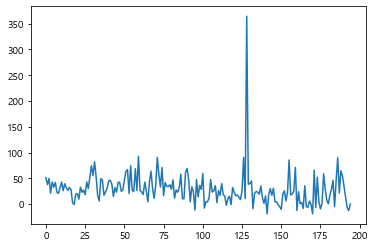

In [38]:
plt.plot(month_df['Profit'])

In [40]:
month_df.iloc[100:150]

,Month,NumOfTrading,Profit,ProfitAverage,Profit_stack,Mdd_day,WinRate
100,2013-05,21,59.348578,2.278921,6.184636e+14,-1.557984,0.761905
101,2013-06,19,-7.725498,-0.374985,5.706842e+14,-7.294375,0.473684
102,2013-07,23,4.401122,0.239053,5.958007e+14,-6.824139,0.565217
103,2013-08,21,4.163206,0.305311,6.206051e+14,-13.811667,0.523810
104,2013-09,18,11.804164,0.672185,6.938623e+14,-7.188161,0.444444
105,2013-10,21,47.552506,1.934912,1.023811e+15,-4.690522,0.714286
106,2013-11,21,23.273583,1.049829,1.262089e+15,-4.376330,0.571429
107,2013-12,20,25.628841,1.183940,1.585548e+15,-2.263687,0.550000
108,2014-01,20,35.875308,1.626795,2.154368e+15,-3.010648,0.500000
109,2014-02,20,2.705032,0.168542,2.212644e+15,-6.529757,0.400000


In [45]:
day_df[(day_df['Date'] > '2015-09-00') & (day_df['Date'] < '2015-10-00')]

,Date,NumOfTrading,Profit,ProfitAverage,Budget_buy,Budget_sell,Profit_stack,Mdd_trade,WinRate
2644,2015-09-01,8,-2.444614,-0.850008,3.502241e+22,3.416625e+22,5.418002e+16,-2.474737,1.000000
2645,2015-09-02,10,-2.429762,-0.552391,3.416626e+22,3.333611e+22,5.286358e+16,-3.150769,0.600000
2646,2015-09-03,10,13.200395,2.469971,3.333611e+22,3.773660e+22,5.984178e+16,-1.682422,0.100000
2647,2015-09-04,7,11.941283,2.538684,3.773643e+22,4.224265e+22,6.698766e+16,-2.631192,0.571429
2648,2015-09-07,5,-1.494313,0.315958,4.224221e+22,4.161098e+22,6.598665e+16,-2.517081,0.400000
2649,2015-09-08,10,16.587583,3.545381,4.161159e+22,4.851394e+22,7.693224e+16,-1.185277,0.500000
2650,2015-09-09,9,4.901685,1.822339,4.851394e+22,5.089194e+22,8.070322e+16,-3.175737,0.333333
2651,2015-09-10,10,2.449361,-0.645431,5.089194e+22,5.213847e+22,8.267993e+16,-5.667313,0.700000
2652,2015-09-11,10,7.706369,2.634943,5.213847e+22,5.615645e+22,8.905155e+16,-1.511687,0.500000
2653,2015-09-14,9,-1.093412,0.039525,5.615645e+22,5.554243e+22,8.807785e+16,-4.028585,0.333333


In [46]:
curr_df[curr_df['Date'] == '2015-09-23']

,Date,Rank,Code,Profit,Buy,Sell,Open,Close,BF_Amount,Amount_rate
26610,2015-09-23,38,084680,28.658150,9.683148e+22,1.245629e+23,3870,3000,5620570,0.531848
26611,2015-09-23,60,043610,-1.075854,9.214138e+21,9.113640e+21,6100,6150,3013820,0.421724
26612,2015-09-23,63,060230,-5.447074,2.237838e+19,2.115624e+19,2372,2502,2966970,0.436789
26613,2015-09-23,78,032580,29.642325,2.658189e+19,3.445622e+19,4920,3785,2551260,0.428337
26614,2015-09-23,80,018470,-0.265000,6.021164e+17,6.004307e+17,1830,1830,2509040,0.432660
26615,2015-09-23,83,001510,-2.323160,4.531656e+17,4.425715e+17,1139,1163,2417060,1.327720
26616,2015-09-23,84,104480,-1.683033,1.492105e+16,1.466772e+16,3120,3165,2413080,0.818199
26617,2015-09-23,88,011090,-0.978412,1.759237e+17,1.741763e+17,6940,6990,2278540,1.090571
26618,2015-09-23,91,025750,-1.503944,1.764469e+16,1.737672e+16,1590,1610,2193100,0.395408
26619,2015-09-23,96,060310,4.984211,5.675249e+15,5.957222e+15,3300,3135,2128530,1.319869
